In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

C:\Users\Szymon\AppData\Roaming\Python\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.6) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
tokenizer = Tokenizer()

data = open('poems.txt', encoding='utf8').read()
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
tokenizer.word_index

{'i': 1,
 'sie': 2,
 'na': 3,
 'w': 4,
 'z': 5,
 'to': 6,
 'a': 7,
 'jak': 8,
 'nie': 9,
 'do': 10,
 'niy': 11,
 'bo': 12,
 'po': 13,
 'że': 14,
 'se': 15,
 'co': 16,
 'boja': 17,
 'we': 18,
 'za': 19,
 '–': 20,
 'ze': 21,
 'już': 22,
 'mu': 23,
 'tak': 24,
 'mioł': 25,
 'je': 26,
 'mo': 27,
 'nic': 28,
 'te': 29,
 'choć': 30,
 'tam': 31,
 'łod': 32,
 'się': 33,
 'bydzie': 34,
 'tego': 35,
 'bez': 36,
 'jeszcze': 37,
 'tyż': 38,
 'potym': 39,
 'nos': 40,
 'my': 41,
 'czy': 42,
 'kożdy': 43,
 'zaś': 44,
 'ni': 45,
 'som': 46,
 'go': 47,
 'jest': 48,
 'u': 49,
 'dom': 50,
 'ło': 51,
 'pod': 52,
 'tyn': 53,
 'kaj': 54,
 'kery': 55,
 'szkole': 56,
 'nom': 57,
 'przeca': 58,
 'ci': 59,
 'cie': 60,
 'nich': 61,
 'mie': 62,
 'przi': 63,
 'by': 64,
 'hanysy': 65,
 'ino': 66,
 'mi': 67,
 'ślonsku': 68,
 'byda': 69,
 'fest': 70,
 'tym': 71,
 'tu': 72,
 'ale': 73,
 'ludzie': 74,
 'o': 75,
 'jo': 76,
 'kto': 77,
 'bezto': 78,
 'juz': 79,
 'yno': 80,
 'paulek': 81,
 'gustlik': 82,
 'ani': 83,
 'tyj

In [4]:
total_words

2032

In [5]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', restore_best_weights=True)
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100


C:\Users\Szymon\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


110/110 [==============================] - 19s 83ms/step - loss: 7.3333 - accuracy: 0.0286
Epoch 2/100
110/110 [==============================] - 9s 84ms/step - loss: 6.8426 - accuracy: 0.0332
Epoch 3/100
110/110 [==============================] - 9s 83ms/step - loss: 6.6056 - accuracy: 0.0352
Epoch 4/100
110/110 [==============================] - 9s 83ms/step - loss: 6.2977 - accuracy: 0.0467
Epoch 5/100
110/110 [==============================] - 9s 84ms/step - loss: 6.0382 - accuracy: 0.0507
Epoch 6/100
110/110 [==============================] - 9s 84ms/step - loss: 5.9649 - accuracy: 0.0644
Epoch 7/100
110/110 [==============================] - 9s 82ms/step - loss: 6.0377 - accuracy: 0.0653
Epoch 8/100
110/110 [==============================] - 9s 82ms/step - loss: 5.8791 - accuracy: 0.0836
Epoch 9/100
110/110 [==============================] - 9s 83ms/step - loss: 5.3107 - accuracy: 0.0936
Epoch 10/100
110/110 [==============================] - 9s 83ms/step - loss: 5.1760 - accurac

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

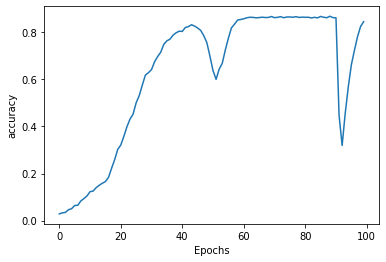

In [9]:
plot_graphs(history, 'accuracy')

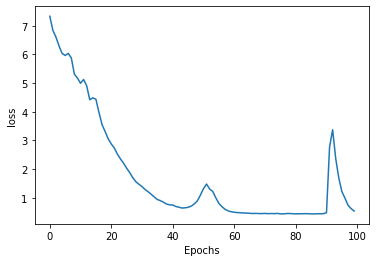

In [10]:
plot_graphs(history, 'loss')

In [11]:
seed_text = "A kej pojemy i pośpiywomy,"
next_words = 60
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 31ms/step
A kej pojemy i pośpiywomy, ciongnyć spać niy zawale – planowe niydziele na grubie na piwo mu piere tyż na nos nos na niebie żłopie nie szukoł na piwo mu szelonto na piwo z eskimosami na to na stare lata taszy na piwo z piwo mu łon na jego ptokach na hołda zaglondoł podlola fedrować dzielom na hołda sadziola piwo mu na piwo na piwo
